In [1]:
import numpy as np
import astropy.units as u 
import scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'

What are the DOF? How many constraints do we have??

# Preliminary Example.

### Determine the output resistance and open circuit voltage for source enclosed in numbered aluminum box.

Error Propagation:
$$\text{The current's uncertainty: }\sigma_{I} = \sqrt{(\frac{\partial I}{\partial V}\sigma_{V})^2+(\frac{\partial I}{\partial R_S}\sigma_{R_{S}})^2}$$
$$\text{For } I = \frac{V}{R_S}$$

In [3]:
def weighted_chi(o,e,sigma):
    w = 1/sigma**2
    c = np.sum(w*(o-e)**2)
    c = c/len(o)             #len(o) represents the degrees of freedom.
    return c

In [4]:
load_resistance = np.asarray([3e2,1e3,1.4e3,2e3,2.4e3,3e3,1e7])
voltage_measured = np.asarray([2.55,5.22,5.99,6.74,7.09,7.46,9.5])

y_err = 0.03*voltage_measured
sr    = 1 # For resistances greater than 100 [Ohms].
x_err = ((y_err/load_resistance)**2+(voltage_measured*sr/(load_resistance**2)**2))**(1/2)

In [5]:
current = voltage_measured/load_resistance

In [6]:
p,V = np.polyfit(current,voltage_measured,deg=1,full=False,cov=True,w=1/y_err)

In [7]:
def linear(c):
    voltage = (c)*p[0]+p[1]
    return voltage

In [8]:
s1 = V[1,1]**(1/2)

In [9]:
csr = weighted_chi(voltage_measured,linear(current),y_err)

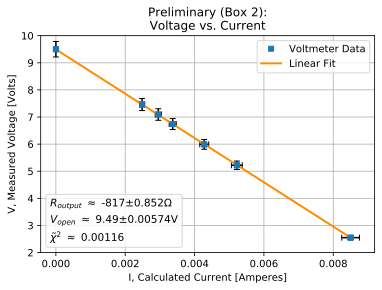

In [12]:
l1, = plt.plot(current,voltage_measured,'s',label='Voltmeter Data',markersize=5,linewidth=2)

plt.errorbar(current,voltage_measured, xerr=x_err, yerr=y_err,fmt='s',ecolor='k',capsize=3,capthick=1,markersize=5)
l2, = plt.plot(current,linear(current),'r',label='Linear Fit',color='darkorange',linewidth=2)
plt.xlabel('I, Calculated Current [Amperes]')
plt.ylabel('V, Measured Voltage [Volts]')
plt.ylim(2,10)
plt.title('Preliminary (Box 2):\nVoltage vs. Current')

slope         = format(p[0], ".3g")
slope_err     = format(V[0,0]**(1/2), ".3g")
intercept     = format(p[1], ".3g")
intercept_err = format(V[1,1]**(1/2), ".3g")

string_slope     = '$R_{output}$ $\\approx$ ' + str(slope) + '$\pm$' + str(slope_err) + '$\Omega$'
string_intercept = '$V_{open}$ $\\approx$ ' + str(intercept) + '$\pm$' + str(intercept_err) + 'V'

l3, = plt.plot(0,0,'none',label=string_slope)
l4, = plt.plot(0,0,'none',label=string_intercept)

csrf            = format(csr, ".3g")
csrf_string     = '$\\tilde{\\chi}^2$ $\\approx$ ' + str(csrf)
l5, = plt.plot(0,0,'none',label=csrf_string)

plt.grid()

legend1 = plt.legend(handles=[l1,l2],loc='upper right',ncol=1)
ax = plt.gca().add_artist(legend1)
plt.legend(handletextpad=0,handlelength=0,handles=[l3,l4,l5],loc='lower left',fontsize=10.5)

plt.savefig('prelim_IV',dpi=300,bbox_inches='tight')

In [11]:
print(p[1]*u.volt)
print(p[0]*u.ohm)

short_circuit_current = -p[1]/p[0]
output_resistance     = (p[1]/short_circuit_current)*(u.volt/u.amp)
output_resistance.to(u.ohm)

9.49273704007992 V
-816.9584293238172 Ohm


<Quantity 816.95842932 Ohm>

$$V_{0} \approx 9.5 \pm{0.006}V \text{, for our open-circuit voltage}$$

Thus:
$$ R_{0} = \frac{V_{0}}{\text{x-intercept}} \text{, where the x-intercept happens to equal the short-circuit current, I.}$$
$$\text{Yielding: }R_{0} \approx 817 \pm{0.85}\Omega $$

# Mystery Boxes!

$$I = \frac{V_{2}}{R} \text{ and } V_{1} = I|Z|$$ 
$$V_{1} = \frac{V_{2}}{R}|Z|$$
$$\text{Thus, } |Z| = R\frac{V_{1}}{V_{2}}$$

In [12]:
"""boxAdata2.png"""

load_resistance = np.asarray([1.003e5,1.003e5,1.003e5,1.003e5,2e4,2e4,2e4,2e4,4.99e3,4.99e3,
                              9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,3.99e2,3.99e2,1e2,1e2,1e2]) #*u.ohm

CH1_voltage     = np.asarray([12.4,3.5,4.8,3.8,7.5,5.2,4,3.6,11.6,4.3,11.6,8.4,6.8,6,3.6,5.6,
                              3.6,8.8,6.6,6])                                                #*u.volt

CH1_frequency   = np.asarray([5.12e1,9.8e1,1.5e2,2.02e2,4.02e2,6.06e2,8.1e2,9.1e2,9.86e2,
                              2.98e3,5.025e3,7.042e3,9.05e3,1.042e4,2.02e4,2.93e4,5.07e4,
                             7.09e4,9e4,9.9e4])                                              #*u.hertz

CH2_voltage     = np.asarray([32,34,34,34,33,33,33,34,32.4,33.2,32.4,33.2,33.2,33.2,34.4,
                              34.2,34,33,30.8,30])                                           #*u.volt

CH2_frequency   = np.asarray([5.12e1,9.82e1,1.507e2,1.99e2,4.02e2,6.05e2,8.06e2,9.12e2,
                              9.86e2,2.98e3,5.025e3,7.042e3,9.02e3,1.042e4,2.01e4,2.95e4,
                              5.05e4,8.08e4,9e4,9.85e4])                                     #*u.hertz

phase_angle     = np.asarray([90,90,91,97,91,92,92,90,92,90,91,92,90,92,95,93,95,91,93,92])  #*u.degree

# Hunch that phase_angle staying consistently at 90deg means resistor?

$$\text{We are told that the DC resistance of Box A is OL (overload, high DC impedance)}$$

In [13]:
s = 0    # Start of data indexing.
e = 20   # End of data indexing.

# We eradicate data values with high angular frequency because of noise of impedance, causing non-linear patterns.

In [14]:
# We suspect at least one capacitor component given the DC impedance.
impedance  = ((CH1_voltage/CH2_voltage)*load_resistance)[s:e]
admittance = 1/impedance

r          = load_resistance[s:e]
error = admittance**2*(0.0072+(4/r**2))**(1/2)

In [15]:
angular_frequency = (2*np.pi*CH1_frequency)[s:e]

In [16]:
p,V = np.polyfit(angular_frequency**2,admittance**2,deg=1,full=False,cov=True,w=1/error)

In [17]:
def linear_a(ang_freq):
    admit_squared = (ang_freq**2*p[0]+p[1])
    return admit_squared

In [18]:
csr = weighted_chi(admittance**2,linear_a(angular_frequency),error)

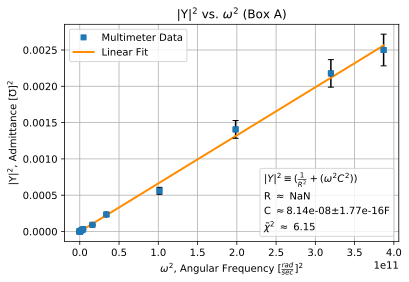

In [19]:
"""Y**2 VERSUS w**2"""
l1, = plt.plot(angular_frequency**2,admittance**2,'s',label='Multimeter Data',markersize=5,linewidth=2)
l2, = plt.plot(angular_frequency**2,linear_a(angular_frequency),'r',label='Linear Fit',color='darkorange',linewidth=2)

plt.errorbar(angular_frequency**2,admittance**2,xerr=0,yerr=error,fmt='s',ecolor='k',capsize=3,capthick=1,markersize=5)

plt.xlabel('$\\omega^2$, Angular Frequency $[\\frac{rad}{sec}]^2$')
plt.ylabel('|Y|$^2$, Admittance [$\\mho$]$^2$')
plt.title('|Y|$^2$ vs. $\\omega^2$ (Box A)')


c_squared = p[0]
capacitance = c_squared**(1/2)
c_err = V[0,0]**(1/2)
c_err /= 2

c_string = 'C $\\approx$' + str(format(capacitance, ".3g")) + '$\\pm$' + str(format(c_err, ".3g")) + 'F'

l3, = plt.plot(0,0,'none',label='$|Y|^{2} \\equiv (\\frac{1}{R^{2}}+(\\omega^{2}C^{2}))$')

l4, = plt.plot(0,0,'none',label='R $\\approx$ NaN')
l5, = plt.plot(0,0,'none',label=c_string)

csrf            = format(csr, ".3g")
csrf_string     = '$\\tilde{\\chi}^2$ $\\approx$ ' + str(csrf)
l6, = plt.plot(0,0,'none',label=csrf_string)


plt.grid()

legend1 = plt.legend(handles=[l1,l2],loc='upper left',ncol=1)
ax = plt.gca().add_artist(legend1)
plt.legend(handletextpad=0,handlelength=0,handles=[l3,l4,l5,l6],loc='lower right')

plt.savefig('boxA_linear_fit',dpi=300,bbox_inches='tight')

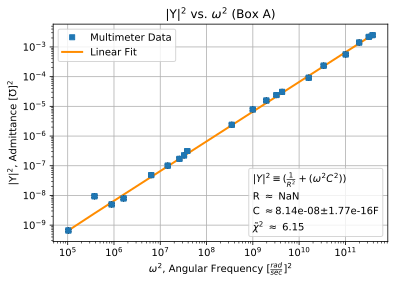

In [20]:
"""Y**2 VERSUS w**2"""
l1, = plt.plot(angular_frequency**2,admittance**2,'s',label='Multimeter Data',markersize=5,linewidth=2)
l2, = plt.plot(angular_frequency**2,linear_a(angular_frequency),'r',label='Linear Fit',color='darkorange',linewidth=2)

plt.errorbar(angular_frequency**2,admittance**2,xerr=0,yerr=error,fmt='s',ecolor='k',capsize=3,capthick=1,markersize=5)

plt.xlabel('$\\omega^2$, Angular Frequency $[\\frac{rad}{sec}]^2$')
plt.ylabel('|Y|$^2$, Admittance [$\\mho$]$^2$')
plt.title('|Y|$^2$ vs. $\\omega^2$ (Box A)')


c_squared = p[0]
capacitance = c_squared**(1/2)
c_err = V[0,0]**(1/2)
c_err /= 2

c_string = 'C $\\approx$' + str(format(capacitance, ".3g")) + '$\\pm$' + str(format(c_err, ".3g")) + 'F'

l3, = plt.plot(0,0,'none',label='$|Y|^{2} \\equiv (\\frac{1}{R^{2}}+(\\omega^{2}C^{2}))$')

l4, = plt.plot(0,0,'none',label='R $\\approx$ NaN')
l5, = plt.plot(0,0,'none',label=c_string)

csrf            = format(csr, ".3g")
csrf_string     = '$\\tilde{\\chi}^2$ $\\approx$ ' + str(csrf)
l6, = plt.plot(0,0,'none',label=csrf_string)


plt.loglog()
plt.grid()

legend1 = plt.legend(handles=[l1,l2],loc='upper left',ncol=1)
ax = plt.gca().add_artist(legend1)
plt.legend(handletextpad=0,handlelength=0,handles=[l3,l4,l5,l6],loc='lower right')

plt.savefig('boxA_linear_fit_log',dpi=300,bbox_inches='tight')

It is unphysical for the y-intercept to be negative. We then choose to truncate data points down to n=8, for the reason that we are unable to re-obtain experimental data.

We refrain from plotting full data set, because higher frequency regime causes unwanted noise.

#### Here's the best fit!
This plot of the admittance squared verus the angular frequency squared has the best linear fit.
$$|Y|^2  \alpha \omega^2$$


$$|Y|^{2} = (\frac{1}{R^{2}}+(\omega^{2}C^{2})) \text{ Resistor and Capacitor in Parallel.} $$
$$\tan{\theta}=\omega CR $$

The complex admittance for a resistor and capacitor in parallel.
The resistance is inherent to the system (internal resistance, almost negligible).

In [21]:
c_squared = p[0]
r_squared_inverse = p[1]
c_err = V[0,0]
r_err = V[1,1]

print('resistance: ', r_squared_inverse**(-1/2))
print('capacitance: ', c_squared**(1/2))

capacitance = c_squared**(1/2)

resistance:  nan
capacitance:  8.138631499710752e-08


C:\Users\ENG\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [22]:
"""boxDdata.png"""
load_resistance = np.asarray([3e4,3e4,3e4,1e4,1e4,5e3,5e3,3e3,3e3,1e3,1e3,1e3,4e2,3e2,3e2,1e2,1e2,1e2,4e1,4e1])         #*u.ohm

frequency       = np.asarray([5.15e1,7.27e1,9.22e1,1.922e2,2.503e2,4.095e2,5.321e2,6.542e2,8.623e2,9.6e2,1.1768e3,2.0851e3,
                       3.0718e3,7.6108e3,9.6099e3,2.75701e4,5.14583e4,7.58441e4,9.03068e4,1.00265e5])                   #*u.hertz

voltage_1       = np.asarray([10.,9.4,8.4,9.6,8.8,9.4,8.6,9.4,8.6,10.6,10.4,9.4,10.4,8.8,8.,
                              7.68,6.48,6.08,8.16,8.16])                                                                #*u.volt

voltage_2       = np.asarray([54.4,68.8,78.4,64.,76.,68.,78.,66.,76.,37.6,44.8,65.6,
                              44.8,68.,74.,52.8,56.,56.,32.8,32.8])                                                     #*u.volt

phase_angle     = np.asarray([96.5,98.4,99.3,96.7,94.5,93.8,94.2,91.4,95.6,91.4,99.7,
                              99.2,100,107,111,135,152,160,158,160])                                                    #*u.degree

$$\text{We are told that the DC resistance of Box D is OL (overload, high DC impedance)}$$

In [23]:
s = 0    # Start of data indexing.
e = 20   # End of data indexing.

In [24]:
# We suspect at least one capacitor component given the DC impedance.
impedance = ((voltage_1/voltage_2)*load_resistance)[s:e]

In [25]:
angular_frequency = (2*np.pi*frequency)[s:e]

In [26]:
r     = load_resistance[s:e]
error = impedance**2*(0.0072+(4/r**2))**(1/2)

In [27]:
p,V = np.polyfit((1/angular_frequency**2),impedance**2,deg=1,full=False,cov=True,w=1/error)

In [28]:
def linear_d(ang_freq):
    z_squared = (1/ang_freq**2)*p[0]+p[1]
    return z_squared

In [29]:
csr = weighted_chi(impedance**2,linear_d(angular_frequency),error)

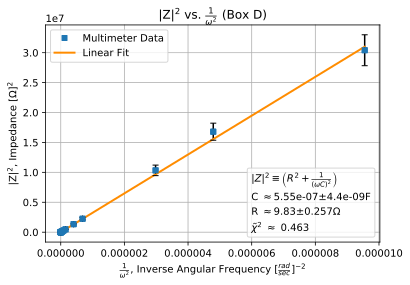

In [30]:
"""Z**2 VERSUS w**-2"""
l1, = plt.plot((1/angular_frequency**2),impedance**2,'s',label='Multimeter Data',markersize=5,linewidth=2)

l2, = plt.plot((1/angular_frequency**2),linear_d(angular_frequency),'r',label='Linear Fit',color='darkorange',linewidth=2)

plt.errorbar(1/angular_frequency**2,impedance**2,xerr=0,yerr=error,fmt='s',ecolor='k',capsize=3,capthick=1,markersize=5)

plt.xlabel('$\\frac{1}{\\omega^2}$, Inverse Angular Frequency $[\\frac{rad}{sec}]^{-2}$')
plt.ylabel('|Z|$^2$, Impedance [$\\Omega]^2$')
plt.title('|Z|$^2$ vs. $\\frac{1}{\\omega^2}$ (Box D)')

csrf            = format(csr, ".3g")
csrf_string     = '$\\tilde{\\chi}^2$ $\\approx$ ' + str(csrf)

l3, = plt.plot(0,0,'none',label='$|Z|^{2} \\equiv \\left(R^{2}+\\frac{1}{\\left(\\omega C \\right)^{2}}\\right)$')

c_squared_inverse = p[0]
capacitance = c_squared_inverse**(-1/2)
slope_err = V[0,0]**(1/2)
c_err = (slope_err/(2*p[0]))*(1/p[0])**(1/2)

r_squared = p[1]
resistance = r_squared**(1/2)
int_err = V[1,1]**(1/2)
r_err = int_err*(1/(2*p[1]))**(1/2)

c_string = 'C $\\approx$' + str(format(capacitance, ".3g")) + '$\\pm$' + str(format(c_err, ".3g")) + 'F'
r_string = 'R $\\approx$' + str(format(resistance, ".3g")) + '$\\pm$' + str(format(r_err, ".3g")) + '$\\Omega$'

l4, = plt.plot(0,0,'none',label=c_string)
l5, = plt.plot(0,0,'none',label=r_string)

l6, = plt.plot(0,0,'none',label=csrf_string)

plt.grid()
legend1 = plt.legend(handles=[l1,l2],loc='upper left',ncol=1)
ax = plt.gca().add_artist(legend1)
plt.legend(handletextpad=0,handlelength=0,handles=[l3,l4,l5,l6],loc='lower right')

plt.savefig('boxD_linear_fit',dpi=300,bbox_inches='tight')

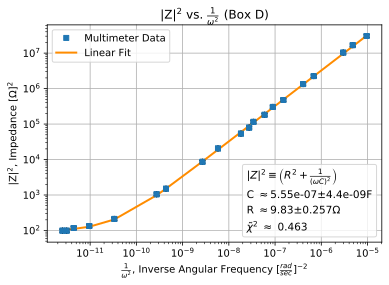

In [31]:
"""Z**2 VERSUS w**-2"""
l1, = plt.plot((1/angular_frequency**2),impedance**2,'s',label='Multimeter Data',markersize=5,linewidth=2)

l2, = plt.plot((1/angular_frequency**2),linear_d(angular_frequency),'r',label='Linear Fit',color='darkorange',linewidth=2)

plt.errorbar(1/angular_frequency**2,impedance**2,xerr=0,yerr=error,fmt='s',ecolor='k',capsize=3,capthick=1,markersize=5)

plt.xlabel('$\\frac{1}{\\omega^2}$, Inverse Angular Frequency $[\\frac{rad}{sec}]^{-2}$')
plt.ylabel('|Z|$^2$, Impedance [$\\Omega]^2$')
plt.title('|Z|$^2$ vs. $\\frac{1}{\\omega^2}$ (Box D)')

csrf            = format(csr, ".3g")
csrf_string     = '$\\tilde{\\chi}^2$ $\\approx$ ' + str(csrf)

l3, = plt.plot(0,0,'none',label='$|Z|^{2} \\equiv \\left(R^{2}+\\frac{1}{\\left(\\omega C \\right)^{2}}\\right)$')

c_squared_inverse = p[0]
capacitance = c_squared_inverse**(-1/2)
slope_err = V[0,0]**(1/2)
c_err = (slope_err/(2*p[0]))*(1/p[0])**(1/2)

r_squared = p[1]
resistance = r_squared**(1/2)
int_err = V[1,1]**(1/2)
r_err = int_err*(1/(2*(p[1]))**(1/2))

c_string = 'C $\\approx$' + str(format(capacitance, ".3g")) + '$\\pm$' + str(format(c_err, ".3g")) + 'F'
r_string = 'R $\\approx$' + str(format(resistance, ".3g")) + '$\\pm$' + str(format(r_err, ".3g")) + '$\\Omega$'

l4, = plt.plot(0,0,'none',label=c_string)
l5, = plt.plot(0,0,'none',label=r_string)

l6, = plt.plot(0,0,'none',label=csrf_string)

plt.grid()
plt.loglog()

legend1 = plt.legend(handles=[l1,l2],loc='upper left',ncol=1)
ax = plt.gca().add_artist(legend1)
plt.legend(handletextpad=0,handlelength=0,handles=[l3,l4,l5,l6],loc='lower right',fontsize=10.5)

plt.savefig('boxD_linear_fit_log',dpi=300,bbox_inches='tight')

#### Here's the best fit!
This plot of the impedance squared verus the inverse angular frequency squared has the best linear fit.
$$|Z|^2 \alpha \frac{1}{\omega^2}$$


$$|Z|^{2} = (R^{2}+\frac{1}{(\omega C)^{2}}) \text{ Resistor and Capacitor connected in series.}$$
$$\tan{\theta}=-\frac{1}{R\omega C}$$

In [32]:
c_squared_inverse = p[0]
r_squared = p[1]
c_err = V[0,0]**(1/2)
r_err = V[1,1]**(1/2)

print('resistance: ',r_squared**(1/2),'err: ',r_err)
print('capacitance: ',c_squared_inverse**(-1/2),'err: ',c_err)

resistance:  9.826330840546422 err:  3.5683479669394598
capacitance:  5.550307730307296e-07 err:  51426546316.39092


$$\text{We are told that the DC resistance of Box E is OL (overload, high DC impedance)}$$